# KNN classifier
In this part, we will use knn algorithm to classify whether the data is cat or dog.
We will convert a 128128 image into a 128128 dimensional vector, where each component represents the grayscale value of the corresponding pixel. By calculating the Manhattan distance, we select the majority class from the k nearest points to the predicted point, and predict the image to belong to that class.


## split the cat and dog data into train and test
Because the data is a little unbalanced, we will choose the same number of cat and dog data for training.
The number of cat and dog image are 9997 and 10288 respectively. We will choose 8000 cat and dog images for training and 1997 cat and 2288 dog images for testing.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
# load the data
cat_path = '.\data\cat'
dog_path = '.\data\dog'
cat_list = os.listdir(cat_path)
dog_list = os.listdir(dog_path)
cat_list = [os.path.join(cat_path, i) for i in cat_list]
dog_list = [os.path.join(dog_path, i) for i in dog_list]


In [3]:
# split the data into train and test
cat_train, cat_test = train_test_split(cat_list, test_size=1997/9997, random_state=42)
dog_train, dog_test = train_test_split(dog_list, test_size=2288/10288, random_state=42)
train_list = cat_train + dog_train
test_list = cat_test + dog_test
train_label = [0] * len(cat_train) + [1] * len(dog_train)
test_label = [0] * len(cat_test) + [1] * len(dog_test)


In [4]:
# convert the image into a vector
for i in range(len(train_list)):
    img = cv.imread(train_list[i], 0)
    img = img.reshape(1, -1)
    if i == 0:
        train_data = img
    else:
        train_data = np.concatenate((train_data, img), axis=0)

In [5]:
for i in range(len(test_list)):
    img = cv.imread(test_list[i], 0)
    img = img.reshape(1, -1)
    if i == 0:
        test_data = img
    else:
        test_data = np.concatenate((test_data, img), axis=0)

In [6]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc5=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.552392065344224
confusion matrix:  [[1114  883]
 [1035 1253]]
classification report:                precision    recall  f1-score   support

           0       0.52      0.56      0.54      1997
           1       0.59      0.55      0.57      2288

    accuracy                           0.55      4285
   macro avg       0.55      0.55      0.55      4285
weighted avg       0.55      0.55      0.55      4285



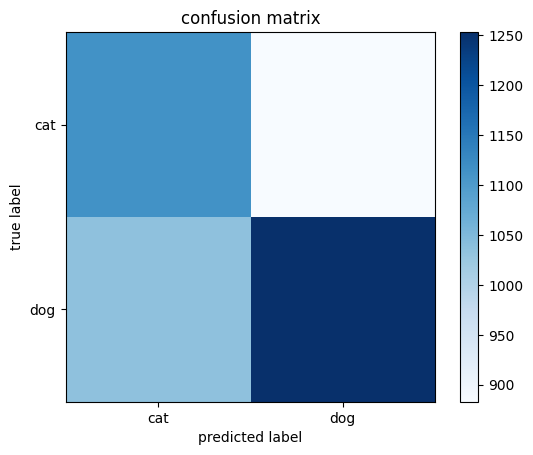

In [7]:
# plot the confusion matrix
cm = confusion_matrix(test_label, pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
plt.xticks([0, 1], ['cat', 'dog'])
plt.yticks([0, 1], ['cat', 'dog'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


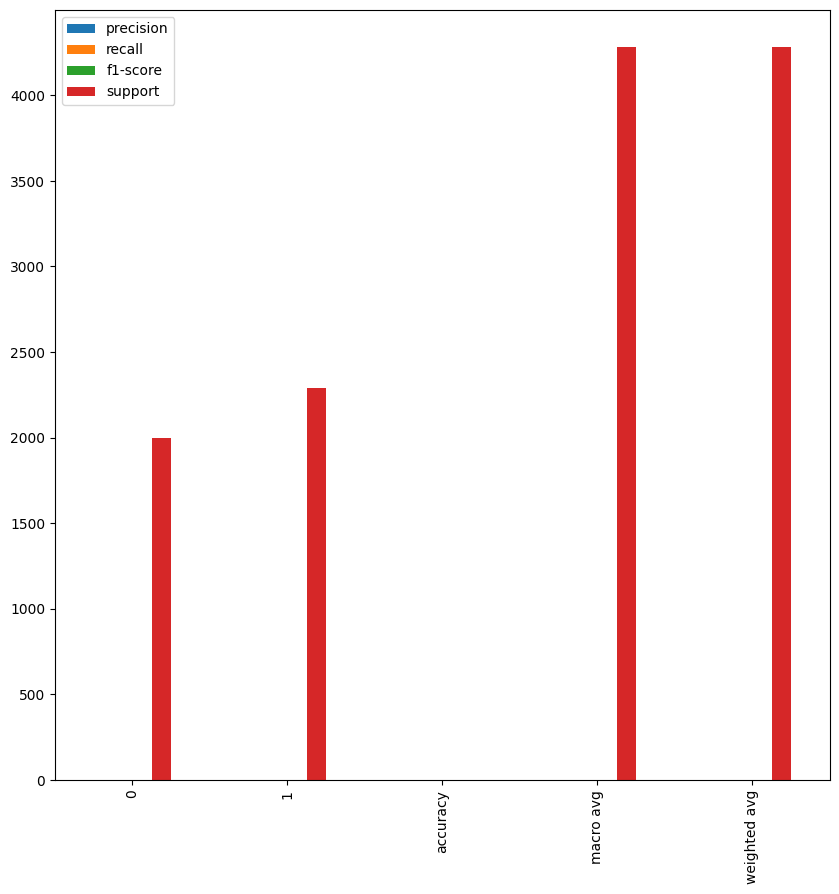

In [8]:
# plot the classification report
cr = classification_report(test_label, pred, output_dict=True)
cr = pd.DataFrame(cr).transpose()
cr.plot(kind='bar', figsize=(10, 10))
plt.show()


And now change the value of k.

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc1=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5428238039673279
confusion matrix:  [[1147  850]
 [1109 1179]]
classification report:                precision    recall  f1-score   support

           0       0.51      0.57      0.54      1997
           1       0.58      0.52      0.55      2288

    accuracy                           0.54      4285
   macro avg       0.54      0.54      0.54      4285
weighted avg       0.55      0.54      0.54      4285



In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc3=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5495915985997666
confusion matrix:  [[1156  841]
 [1089 1199]]
classification report:                precision    recall  f1-score   support

           0       0.51      0.58      0.55      1997
           1       0.59      0.52      0.55      2288

    accuracy                           0.55      4285
   macro avg       0.55      0.55      0.55      4285
weighted avg       0.55      0.55      0.55      4285



In [11]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc11=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5684947491248541
confusion matrix:  [[1079  918]
 [ 931 1357]]
classification report:                precision    recall  f1-score   support

           0       0.54      0.54      0.54      1997
           1       0.60      0.59      0.59      2288

    accuracy                           0.57      4285
   macro avg       0.57      0.57      0.57      4285
weighted avg       0.57      0.57      0.57      4285



In [12]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc25=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5845974329054843
confusion matrix:  [[1030  967]
 [ 813 1475]]
classification report:                precision    recall  f1-score   support

           0       0.56      0.52      0.54      1997
           1       0.60      0.64      0.62      2288

    accuracy                           0.58      4285
   macro avg       0.58      0.58      0.58      4285
weighted avg       0.58      0.58      0.58      4285



In [13]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc50=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5850641773628938
confusion matrix:  [[ 967 1030]
 [ 748 1540]]
classification report:                precision    recall  f1-score   support

           0       0.56      0.48      0.52      1997
           1       0.60      0.67      0.63      2288

    accuracy                           0.59      4285
   macro avg       0.58      0.58      0.58      4285
weighted avg       0.58      0.59      0.58      4285



In [14]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc100=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5904317386231038
confusion matrix:  [[ 852 1145]
 [ 610 1678]]
classification report:                precision    recall  f1-score   support

           0       0.58      0.43      0.49      1997
           1       0.59      0.73      0.66      2288

    accuracy                           0.59      4285
   macro avg       0.59      0.58      0.57      4285
weighted avg       0.59      0.59      0.58      4285



In [15]:
knn = KNeighborsClassifier(n_neighbors=201)
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
acc201=accuracy_score(test_label, pred)
print('accuracy: ', accuracy_score(test_label, pred))
print('confusion matrix: ', confusion_matrix(test_label, pred))
print('classification report: ', classification_report(test_label, pred))

accuracy:  0.5885647607934655
confusion matrix:  [[ 686 1311]
 [ 452 1836]]
classification report:                precision    recall  f1-score   support

           0       0.60      0.34      0.44      1997
           1       0.58      0.80      0.68      2288

    accuracy                           0.59      4285
   macro avg       0.59      0.57      0.56      4285
weighted avg       0.59      0.59      0.56      4285



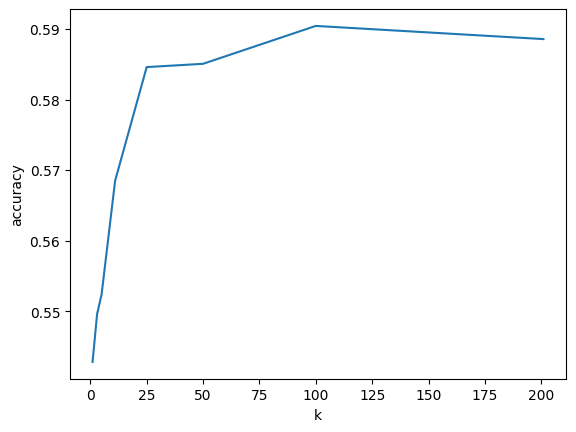

In [16]:
#plot the ralation between k and accuracy
k = [1, 3, 5, 11, 25, 50, 100, 201]
accu=[acc1,acc3,acc5,acc11,acc25,acc50,acc100,acc201]
plt.plot(k,accu)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()


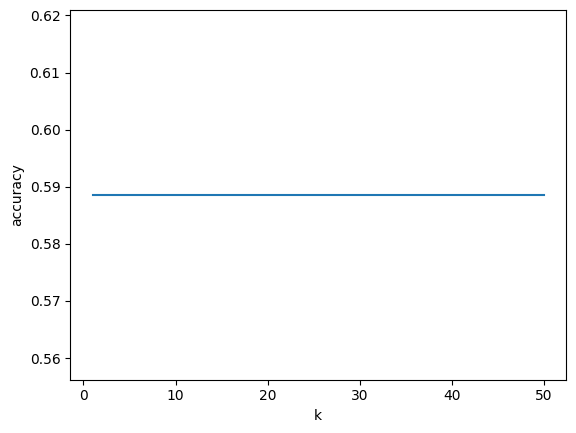

In [18]:
accu=[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_label)
    accu.append(accuracy_score(test_label, pred))
plt.plot(range(1,51),accu)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

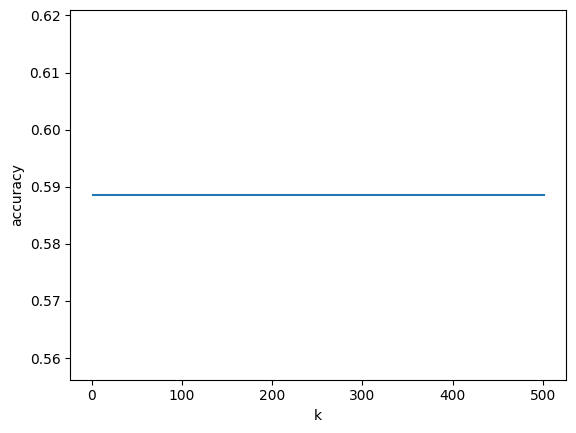

In [19]:
accu=[]
for k in range(1,502,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_label)
    accu.append(accuracy_score(test_label, pred))
plt.plot(range(1,502,10),accu)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

It is obvious that the accuracy is always below 0.59. It cannot reach our goal,so we need to change the way to classify.